## EE634 HW2 
### Kutay Ugurlu 2232841

In [438]:

import numpy as np 
from numpy.linalg import eig
from matplotlib import pyplot as plt 
from scipy.linalg import hadamard
from skimage.color import rgb2gray
from scipy.fft import fft, ifft, fft2, ifft2, dct
%matplotlib inline

# Q1

## a

In [439]:
def Hadamard_doubler(H):
    s1,_ = H.shape
    H_double_first_row = np.hstack((H,H))
    H_double_second_row = np.hstack((H,-1*H))
    return 1/np.sqrt(2) * np.vstack((H_double_first_row,H_double_second_row))

def HadamardMtx(N:int):
    H = 1/np.sqrt(2) * np.array([[1,1],[1,-1]])
    for _ in range(1,N):
        H = Hadamard_doubler(H)
    return H
    

In [440]:
######### TEST ################
for N in range(8):
    assert not np.any(np.isclose(hadamard(2**N)-HadamardMtx(N),np.zeros((2**N,2**N)))) 
print("All tests passed!")

All tests passed!


## b

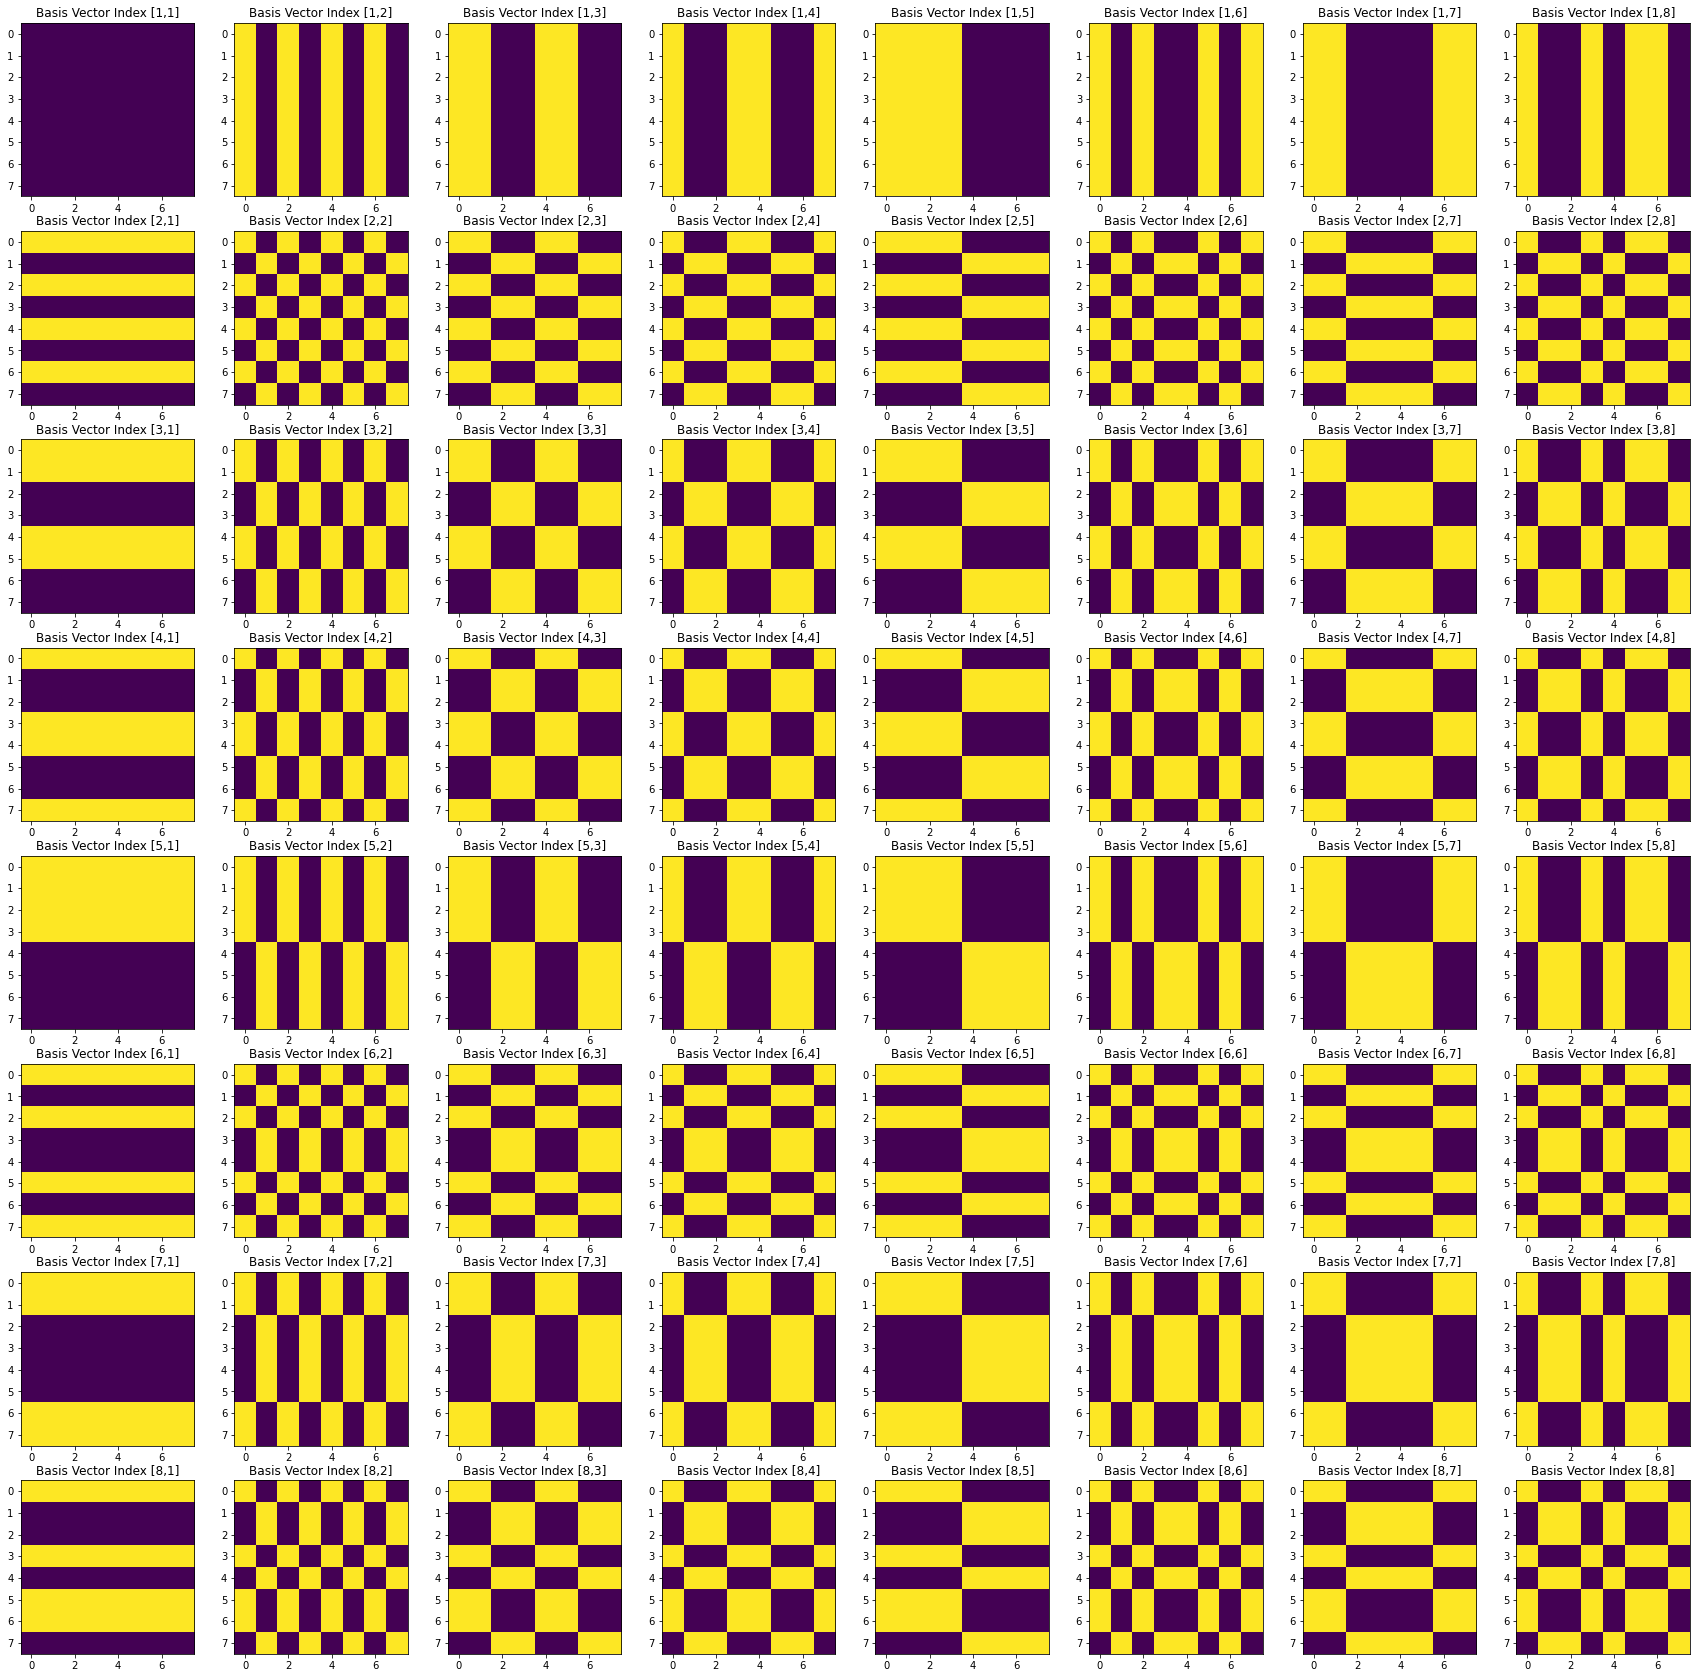

In [441]:
H = HadamardMtx(3)
plt.figure(figsize=(30,30))
for i in range(8):
    for j in range(8):
        basis_vec = np.zeros((8,8))
        basis_vec[i,j] = 1
        hadamard_basis_vec = H.dot(basis_vec).dot(H.T) # 2D transform with 1D transform matrices
        plt.subplot(8,8,8*(i)+(j+1))
        plt.imshow(hadamard_basis_vec)
        plt.title("Basis Vector Index ["+str(i+1)+","+str(j+1)+"]")


# Q2

## a

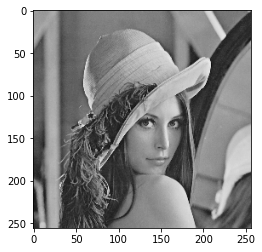

In [449]:
Lena = plt.imread("256by256grayscaleLena.png")
Lena = rgb2gray(Lena[...,1:4])
plt.imshow(Lena, cmap="gray")

## b

In [490]:
# def dct(x):
#     if len(x.shape) == 1:
#         x = np.reshape(x,(1,x.shape[0])) 
#     N = x.shape[1]
#     y = np.hstack((x,np.flip(x)))
#     Y = fft(y)
#     k = np.arange(0,N)
#     W = np.exp(-1j*(np.pi)/N*k/2)
#     Y_truncated = Y[:,0:N]
#     Cx = W*(Y_truncated)
#     return np.real(Cx)

def zero_mean_cols(img):
    return (img.T - img.mean(axis=1)).T

def cov(img):
    img = zero_mean_cols(img)
    return img.dot(img.T)

def KLT_mtx(img):
    C_img = cov(img)
    w_vl = eig(C_img)
    return w_vl[1].T

def diagonal_coef_ratio(cov_mtx):
    cov_mtx = np.abs(cov_mtx)
    print("\nDiagonal Coefficients Value Ratio:",(np.trace(cov_mtx)) / np.sum(cov_mtx))


Diagonal Coefficients Value Ratio: 0.014061467


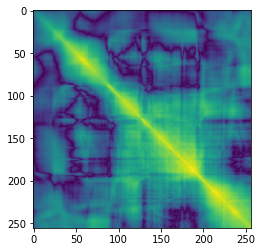

In [491]:
img = Lena
Cov_Lena = cov(img)
diagonal_coef_ratio(Cov_Lena)
plt.imshow(np.log(1+np.abs(Cov_Lena)))


Diagonal Coefficients Value Ratio: 0.078414574


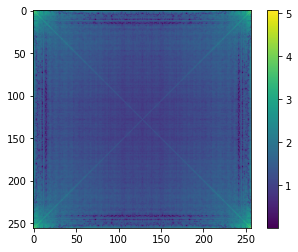

In [512]:
img = fft(Lena,axis=0)
Cov_Lena = cov(np.abs(img))
diagonal_coef_ratio((Cov_Lena))
plt.imshow(np.log10(1+np.abs((Cov_Lena))))
plt.colorbar()


Diagonal Coefficients Value Ratio: 0.13431992


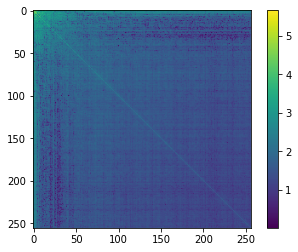

In [508]:
img = np.abs(dct(Lena,axis=0))
Cov_Lena = cov(img)
diagonal_coef_ratio(Cov_Lena)
plt.imshow(np.log10(1+np.abs(Cov_Lena)))
plt.colorbar()


Diagonal Coefficients Value Ratio: 0.9999786


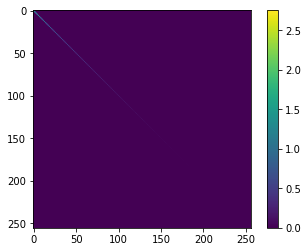

In [509]:
A = KLT_mtx(Lena)
img = A.dot(Lena)
Cov_Lena = cov(img)
diagonal_coef_ratio(Cov_Lena)
plt.imshow(np.log10(1+np.abs(Cov_Lena)))
plt.colorbar()

## c

In [ ]:
s1,_ = Lena.shape
step = s1 / 16
row_begin = 0
for row in range(16):
    for col in range(16):
        patch = Lena[]
        
        